<a href="https://colab.research.google.com/github/xiaoyi-yuxiao/revert-code-to-python/blob/master/2020_06_15_value_at_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install requests_html

     |████████████████████████████████| 153kB 7.6MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 133kB 12.7MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
  Created wheel for parse: filename=parse-1.15.0-cp36-none-any.whl size=23710 sha256=aa7f527678cd7975e3f4348fe092bfaa28659e520b759c384d715d6b60b3e281
  Stored in directory: /root/.cache/pip/wheels/07/ee/c8/eced0759f09fc635398ab1b8e89c38549b28e5db7fd4a53ba5
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13484 sha256=16dad7f5913df15c6dedb34ba3fef25af5b911a24da751d356ca57737dfdbc24
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
Successfully built parse fake-useragent
ERROR: kaggle 1.5.6 has requirement urllib3<1.25,>=1.21.1, but you'll have urllib3 1.25.9 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is i

In [0]:
pip install yahoo_fin

In [0]:
import numpy as np
from yahoo_fin.stock_info import *
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from scipy import stats

In [0]:
def usr_input():
  #date
  pass

In [0]:
tickers = tickers_dow()
Data = []
for ticker in tickers:
  Data.append(get_data(ticker, start_date = '2018-12-16',index_as_date = True, interval = '1d')['adjclose'])
Data = pd.concat(Data,axis=1)
Ret = Data.pct_change().dropna()

define port value and plot return histogram

In [0]:
port_val = 1000000 #the portafolio value
AMPSTvolpct = np.divide(np.ones((len(tickers),1)),len(tickers)) #equally distribute to different asset in that portafolio
PortReturn = np.dot(Ret, AMPSTvolpct)

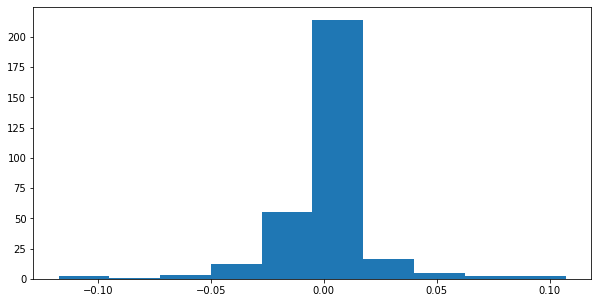

In [0]:
plt.figure(figsize=(20,10))
counts,bins,dum = plt.hist(PortReturn)
#plt.suptitle('   hist for '+Dow Jones,fontsize = 24)
#plt.xlabel('Return',fontsize = 15)
#plt.ylabel('Frequency',fontsize = 15)

#plt.title(Start+' to '+End,fontsize = 16)

Historical simulation method

In [0]:
historical_var = -np.percentile(PortReturn,1)*port_val
print(historical_var)

68432.5125312518


Variance covariance method

In [0]:
covMatrix = np.cov(Ret.T,bias=True)
variance_pre = np.dot(AMPSTvolpct.T,covMatrix)
variance = np.dot(variance_pre,AMPSTvolpct)

VaR2 = np.sqrt(variance)*2.32*port_val
print(VaR2)

[[46505.48051956]]
